In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator , img_to_array , load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix

Load the data 

In [11]:
train_dir = '/Users/User/Desktop/Python Project/train'
test_dir = '/Users/User/Desktop/Python Project/test'

In [12]:
# set the dimensions for resizing the images 
img_width, img_height = 48, 48
img_size = (img_height,img_width)
# Set the batch size for training aand testing data 
#The batch size refers to the number of images that are propagated through the neural network at a time
batch_size = 64
# Create ImageDataGenerator for training data with rescaling
# ImageDataGenerator is a class in Keras , a popular deep learning library used for generating batches of image data
train_datagen = ImageDataGenerator(rescale=1./255)
# Create ImageDataGenerator for testing data with rescaling
test_datagen = ImageDataGenerator(rescale=1./255)
# Generate batches of training data from the directory
train_generator = train_datagen.flow_from_directory(
    train_dir,                
    target_size=(48,48),           # Resize images to specified dimensions
    batch_size=batch_size,         # Number of samples per batch
    color_mode="grayscale",        # Convert images to grayscale
    class_mode="categorical"       # Use categorical labels
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48,48),
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode="categorical",
    shuffle=False             # testing not randomly but organizationally
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [13]:
# Create a Sequential model 
model = Sequential()
# Add a convolutional layer with 64 filters, a 3x3 kernel, ReLU activation(Non-linearity,simplicity,sparse activation), and input shape
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 1)))
# Add batch normalization layer
# to improve the training stability and speed
# Batch normalization normalizes the activations of the previous layer at each batch
model.add(BatchNormalization())
# Add max pooling layer
#  typically used to reduce the spatial dimensions of an input volume in convolutional neural networks (CNNs).
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add dropout layer to prevent overfitting
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
# Add output layer with 7 units (assuming 7 classes) and softmax activation
# The softmax activation function is commonly used in the output layer of neural networks for multi-class classification tasks
model.add(Dense(7, activation='softmax'))

In [14]:
# Compile the model
 # Use the Adam optimizer for training
 # Use categorical crossentropy loss function
 # Track accuracy metric during training


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/50
448/448 [==============================] - ETA: 0s - loss: 0.5750 - accuracy: 0.7892
Epoch 1: val_accuracy improved from -inf to 0.62263, saving model to emotion_detection_model.h5
448/448 [==============================] - 68s 152ms/step - loss: 0.5750 - accuracy: 0.7892 - val_loss: 1.1714 - val_accuracy: 0.6226
Epoch 2/50


c:\Users\user\anaconda\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


448/448 [==============================] - ETA: 0s - loss: 0.5761 - accuracy: 0.7876
Epoch 2: val_accuracy did not improve from 0.62263
448/448 [==============================] - 68s 151ms/step - loss: 0.5761 - accuracy: 0.7876 - val_loss: 1.2450 - val_accuracy: 0.6115
Epoch 3/50
448/448 [==============================] - ETA: 0s - loss: 0.5347 - accuracy: 0.8037
Epoch 3: val_accuracy did not improve from 0.62263
448/448 [==============================] - 68s 152ms/step - loss: 0.5347 - accuracy: 0.8037 - val_loss: 1.1822 - val_accuracy: 0.6223
Epoch 4/50
448/448 [==============================] - ETA: 0s - loss: 0.5173 - accuracy: 0.8102
Epoch 4: val_accuracy did not improve from 0.62263
448/448 [==============================] - 69s 154ms/step - loss: 0.5173 - accuracy: 0.8102 - val_loss: 1.3243 - val_accuracy: 0.5957
Epoch 5/50
448/448 [==============================] - ETA: 0s - loss: 0.4950 - accuracy: 0.8193
Epoch 5: val_accuracy improved from 0.62263 to 0.62723, saving model to 

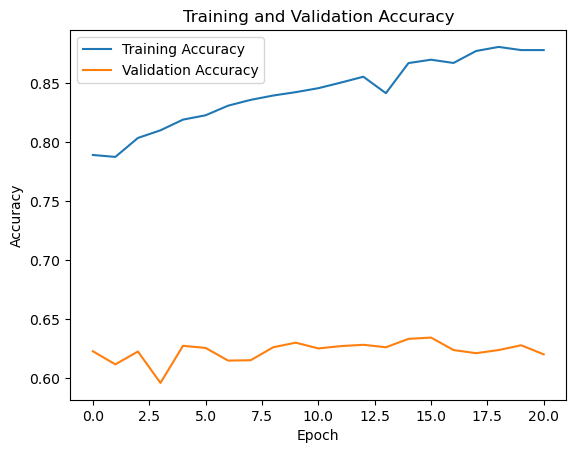

In [22]:
epochs = 50
# Define a ModelCheckpoint callback to save the best model based on validation accuracy
checkpoint = ModelCheckpoint("emotion_detection_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
# Define an EarlyStopping callback to stop training if validation accuracy stops improving
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, mode='max', verbose=1)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n//train_generator.batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.n//test_generator.batch_size,
    callbacks=[checkpoint, early_stop]
)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [30]:
# Evaluate the model on the test data generator
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('\nTest accuracy:', test_acc)

113/113 - 4s - loss: 1.4263 - accuracy: 0.6201 - 4s/epoch - 39ms/step

Test accuracy: 0.6200891733169556


In [31]:
# Evaluate the trained model on the test data generator
model.evaluate(test_generator)

113/113 [==============================] - 5s 40ms/step - loss: 1.4263 - accuracy: 0.6201


[1.4263122081756592, 0.6200891733169556]

In [32]:
# Fait des predictions sur l'ensemble de données de test à l'aide du modèle 
predictions = model.predict(test_generator)
# Détermine la classe prédite pour chaque exemple en prenant l'indice de la valeur maximale de chaque prédiction 
y_pred = np.argmax(predictions, axis=1)
# # Extrait les vraies classes des exemples de l'ensemble de données de test
y_true = test_generator.classes

113/113 [==============================] - 5s 40ms/step


              precision    recall  f1-score   support

           0       0.58      0.47      0.52       958
           1       0.82      0.59      0.68       111
           2       0.50      0.43      0.46      1024
           3       0.80      0.82      0.81      1774
           4       0.53      0.59      0.56      1233
           5       0.48      0.54      0.51      1247
           6       0.76      0.77      0.76       831

    accuracy                           0.62      7178
   macro avg       0.64      0.60      0.62      7178
weighted avg       0.62      0.62      0.62      7178



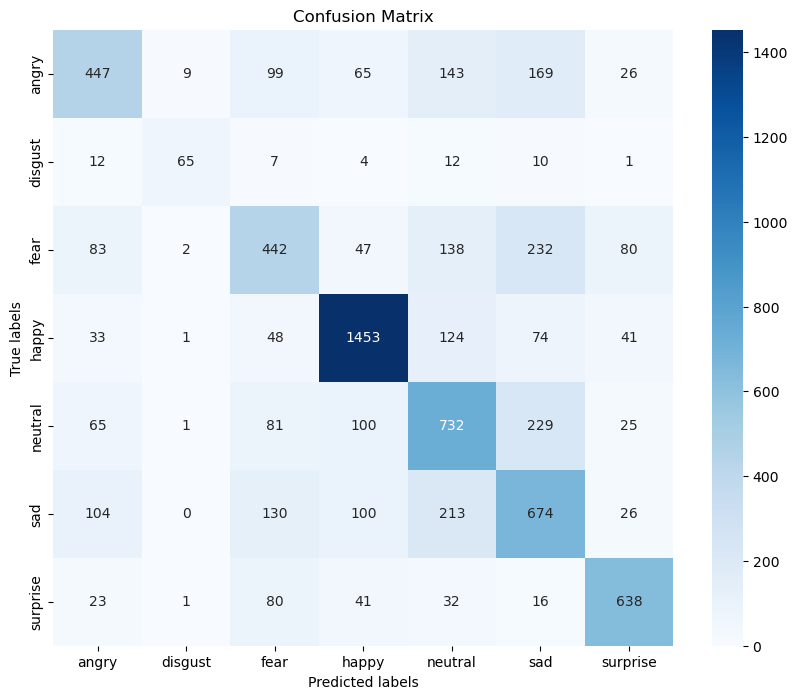

In [33]:
# Imprime un rapport de classification pour évaluer les performances du modèle
print(classification_report(y_true, y_pred))

# Calcule la matrice de confusion pour évaluer la performance du modèle
cm = confusion_matrix(y_true, y_pred)

# Crée une figure pour afficher la matrice de confusion
plt.figure(figsize=(10, 8))

# Crée une heatmap de la matrice de confusion avec des annotations
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())

# Ajoute des étiquettes aux axes x et y de la heatmap
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Ajoute un titre à la figure
plt.title('Confusion Matrix')

# Affiche la figure contenant la matrice de confusion
plt.show()


In [35]:

import numpy as np
from tensorflow.keras.preprocessing import image


# Chemin de l'image à prédire
img_path = "/Users/User/Desktop/Python Project/images/happy.jpg" 

# Charge l'image et la redimensionne à la taille attendue par le modèle
img = image.load_img(img_path, target_size=img_size, grayscale=True)

# Convertit l'image en un tableau numpy
img_array = image.img_to_array(img)

# Ajoute une dimension supplémentaire pour créer un lot d'une seule image et normalise les valeurs des pixels
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Effectue les prédictions sur l'image
prediction = model.predict(img_array)[0]

# Récupère les étiquettes des émotions à partir des données d'entraînement
emotion_label = train_generator.class_indices.keys()
emotions = list(emotion_label)

# Détermine l'émotion prédite en sélectionnant celle avec la probabilité la plus élevée
predicted_emotion = emotions[np.argmax(prediction)]

# Calcule les scores de confiance pour chaque émotion prédite
confidence_scores = {emotion: round(score * 100, 2) for emotion, score in zip(emotions, prediction)}

# Affiche l'émotion prédite et les scores de confiance associés
print("Predicted Emotion:", predicted_emotion)
print("Confidence Scores:")
for emotion, score in confidence_scores.items():
    print(f"{emotion}: {score}%")


1/1 [==============================] - 0s 23ms/step
Predicted Emotion: happy
Confidence Scores:
angry: 24.66%
disgust: 0.0%
fear: 0.0%
happy: 45.55%
neutral: 29.77%
sad: 0.01%
surprise: 0.0%


c:\Users\user\anaconda\Lib\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


In [36]:
# Enregistrer data
model.save('/Users/User/Desktop/Python Project/emotion_detection_model.h5') 

c:\Users\user\anaconda\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
